Start

In [263]:
#Importing needed modules .
from pandas import read_csv , concat , DataFrame , get_dummies
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras.metrics import mean_absolute_error 
from matplotlib.pyplot import plot , show , figure , xlabel , ylabel , title , legend

In [264]:
#Reading train csv file and getting ten samples randomly .
path = "D:\\datasets\\House_pricees\\train.csv"
file = read_csv(path)
df = file.copy()
df = df.drop(['Id'],axis=1)
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
772,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
459,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
695,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
1352,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,134900
1218,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,80500
594,20,RL,88.0,7990,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal,110000
1034,30,RL,50.0,6305,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,119750
344,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
1269,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,144000
1096,70,RM,60.0,6882,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,127000


In [265]:
#Reading test csv file and getting ten samples randomly .
path_test = "D:\\datasets\\House_pricees\\test.csv"
file_test = read_csv(path)
df_test = file_test.copy()
finall_test = df_test.drop(['Id'],axis=1)
finall_test.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
235,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,89500
209,20,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,145000
880,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,157000
121,50,RM,50.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,100000
742,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,12,2007,WD,Normal,179000
226,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml,290000
306,60,RL,116.0,13474,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,225000
25,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
315,60,RL,71.0,7795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,188500
128,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,155000


In [266]:
#Converting train data frame to list .
df_array = df.to_numpy().tolist()
#Merging test data frame to train data frame .
df_array.extend(finall_test.to_numpy().tolist())

In [267]:
#Making a data frame from that .
concated_df = DataFrame(df_array,columns=df.columns)
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuil

In [268]:
#Seperating prices and dropping unuseful columns .
lbl = concated_df.SalePrice
concated_df = concated_df.drop(['SalePrice'],axis = 1)

In [269]:
#There are some columns that have null datas . 
#some of them have null datas over 45% of total samples .
for col in concated_df.columns :
    if concated_df[col].isnull().sum() != 0 :
        print(col)
        print(f'{concated_df[col].isnull().sum()} , {(concated_df[col].isnull().sum()*100)/2920:.2f}% of total samples')

LotFrontage
518 , 17.74% of total samples
Alley
2738 , 93.77% of total samples
MasVnrType
16 , 0.55% of total samples
MasVnrArea
16 , 0.55% of total samples
BsmtQual
74 , 2.53% of total samples
BsmtCond
74 , 2.53% of total samples
BsmtExposure
76 , 2.60% of total samples
BsmtFinType1
74 , 2.53% of total samples
BsmtFinType2
76 , 2.60% of total samples
Electrical
2 , 0.07% of total samples
FireplaceQu
1380 , 47.26% of total samples
GarageType
162 , 5.55% of total samples
GarageYrBlt
162 , 5.55% of total samples
GarageFinish
162 , 5.55% of total samples
GarageQual
162 , 5.55% of total samples
GarageCond
162 , 5.55% of total samples
PoolQC
2906 , 99.52% of total samples
Fence
2358 , 80.75% of total samples
MiscFeature
2812 , 96.30% of total samples


In [270]:
#dropping columns with too much scale of null datas .
concated_df = concated_df.drop([col for col in concated_df.columns if concated_df[col].isnull().sum()>=1314],axis=1)

In [271]:
#Seperating columns with numeric data type and non-numeric data type .
df_nan = concated_df.drop([col for col in concated_df.columns if concated_df[col].dtype != 'O'],axis=1)
df_num = concated_df.drop(df_nan.columns,axis=1)

In [272]:
#Evaluating what we have done .
bad = 0
for col in df_num.columns :
    if df_num[col].dtype == 'O' :
        bad += 1
if bad > 0 :
    print(f'{bad} nan data types found .')
else :
    print('All columns have numeric data type .')

All columns have numeric data type .


In [273]:
#Evaluating what we have done .
bad = 0
for col in df_nan.columns :
    if df_nan[col].dtype != 'O' :
        bad += 1
if bad > 0 :
    print(f'{bad} numeric data types found .')
else :
    print('All columns have non-numeric data type .')

All columns have non-numeric data type .


In [274]:
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,...,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [275]:
#Instancing from imputer and scaler object .
scaler = StandardScaler()
imputer = SimpleImputer()
imputer_mf = SimpleImputer(strategy='most_frequent')

In [276]:
#Filling data frame that have numeric data type with mean strategy . 
imputed_num_df = DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)
#scaling them to values between 0 to 1 .
imputed_num_df = DataFrame(scaler.fit_transform(imputed_num_df),columns=df_num.columns)
key = True
for null in imputed_num_df.isnull().sum() :
    if null>0 :
        key = False
        print(f'Imputer did not work true .')
        break
if key :
    print('zero null found .')

zero null found .


In [277]:
#Filling data frame that have non-numeric data type with 'most frequent' strategy . 
imputed_df_nan = DataFrame(imputer_mf.fit_transform(df_nan),columns=df_nan.columns)
imputed_df_nan.isnull().sum()
#Encoding with 'one hot encode' strategy .
encoded_nan_df = get_dummies(imputed_df_nan)
key = True
for null in encoded_nan_df.isnull().sum() :
    if null>0 :
        key = False
        print(f'Imputer did not work true .')
        break
if key :
    print('zero null found .')

zero null found .


In [278]:
#Evaluating corelation coefficent relatives between numeric data frame and prices .
test_df = imputed_num_df.copy()
test_df['Label'] = lbl
Corr = test_df.corr()
Corr['Label'].sort_values(ascending=False)

Label            1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: Label, dtype: float64

In [279]:
#Joining numeric data frame to encoded non-numeric data frame .
ready_df = concat([imputed_num_df,encoded_nan_df],axis = 1)

In [280]:
ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(234)
memory usage: 1.5 MB


In [281]:
#Seperating data set to train and test arrays .
xtr , xts , ytr ,yts = ready_df[:1460] , ready_df[1460:] , lbl[:1460] , lbl[1460:]

In [282]:
#Training and getting scores .
model = LinearRegression().fit(xtr,ytr)

In [283]:
#Evaluating on train set .
model.score(xtr,ytr)*100

93.04575964218044

In [284]:
#Evaluating on test set .
model.score(xts,yts)*100

93.04575964218044

In [285]:
#Evaluating on main datas .
model.score(ready_df,lbl)*100

93.04575814317737

In [286]:
#Measuring mean absolute error on test datas .
preds = model.predict(xts)
print(f'{mean_absolute_error(yts,preds).numpy():.2f}')

13498.43


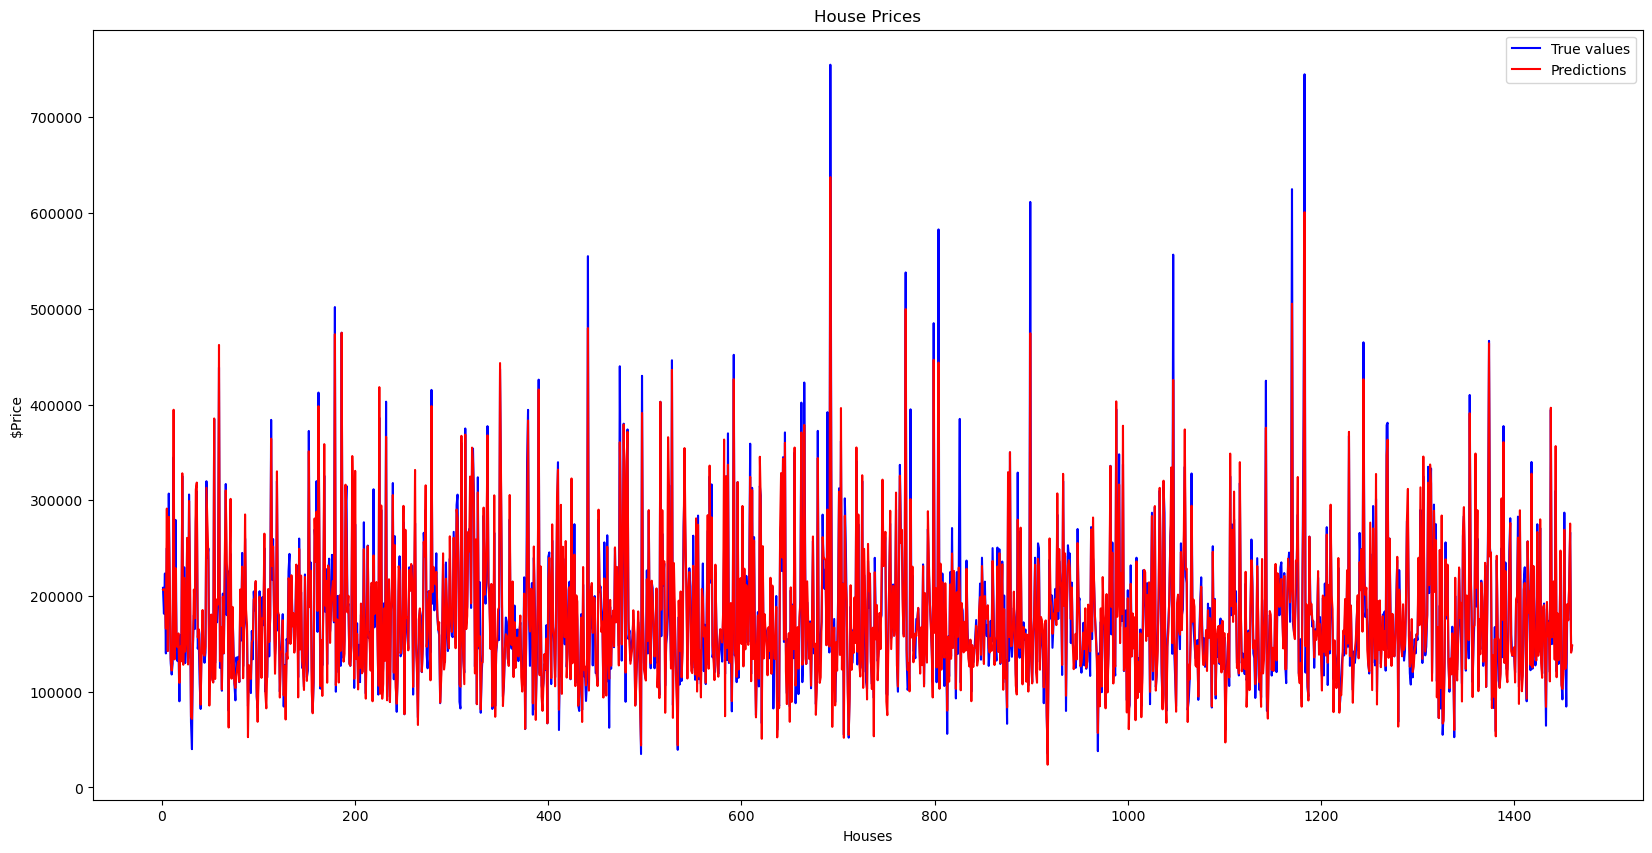

In [287]:
#Plotting model's performance on test samples .
figure(figsize=(20,10))
plot(range(1,len(yts)+1),yts,'blue')
plot(range(1,len(preds)+1),preds,'red')
xlabel('Houses')
ylabel('$Price')
title('House Prices')
legend(['True values','Predictions'])
show()

End